# Exercice 1

In [48]:
import pylab as pl
from sympy import *

X = [[1, 1, 2, 0], [0, 2, 2, 0], [0, 0, 2, 2]]

n = 4

p = 3

g = [1, 1, 1, 1]

# Conversion de X et g en matrices SymPy
X = Matrix(X)
g = Matrix(g)

# Modification de la matrice X
X_modified = X - ones(p, 1) * g.T

X_modified

Matrix([
[ 0,  0, 1, -1],
[-1,  1, 1, -1],
[-1, -1, 1,  1]])

In [49]:
S = (1 / (n - 1)) * X_modified.T * X

S

Matrix([
[                 0, -0.666666666666667,  -1.33333333333333, -0.666666666666667],
[                 0,  0.666666666666667,                  0, -0.666666666666667],
[ 0.333333333333333,                1.0,                2.0,  0.666666666666667],
[-0.333333333333333,               -1.0, -0.666666666666667,  0.666666666666667]])

In [50]:
# Prendre les valeurs propres 

eig = S.eigenvects()

eig

[(1.74535599249993,
  1,
  [Matrix([
   [-0.371748034460185],
   [ 0.371748034460184],
   [ 0.601500955007546],
   [-0.601500955007546]])]),
 (1.33333333333333,
  1,
  [Matrix([
   [ 0.5],
   [ 0.5],
   [-0.5],
   [-0.5]])]),
 (0.254644007500070,
  1,
  [Matrix([
   [ 0.601500955007546],
   [-0.601500955007546],
   [ 0.371748034460184],
   [-0.371748034460184]])]),
 (-5.55111512312578e-17,
  1,
  [Matrix([
   [-0.831253875554907],
   [-0.831253875554907],
   [ 0.831253875554907],
   [-0.831253875554907]])])]

In [51]:
eig_list = [eig[2][2][0], eig[0][2][0], eig[1][2][0]]

eig_list

[Matrix([
 [ 0.601500955007546],
 [-0.601500955007546],
 [ 0.371748034460184],
 [-0.371748034460184]]),
 Matrix([
 [-0.371748034460185],
 [ 0.371748034460184],
 [ 0.601500955007546],
 [-0.601500955007546]]),
 Matrix([
 [ 0.5],
 [ 0.5],
 [-0.5],
 [-0.5]])]

In [52]:
var = (simplify(eig_list[i].norm()) for i in range(p))

eig_list

[Matrix([
 [ 0.601500955007546],
 [-0.601500955007546],
 [ 0.371748034460184],
 [-0.371748034460184]]),
 Matrix([
 [-0.371748034460185],
 [ 0.371748034460184],
 [ 0.601500955007546],
 [-0.601500955007546]]),
 Matrix([
 [ 0.5],
 [ 0.5],
 [-0.5],
 [-0.5]])]

In [53]:
C1 = X * eig_list[0] / eig_list[0].norm()
C2 = X * eig_list[1]

In [54]:
simplify(C1.T * C2)

Matrix([[-2.22044604925031e-16]])

In [55]:
simplify(C1.norm()).evalf(), eig[0][0].evalf()

(0.874032048897642, 1.74535599249993)

In [56]:
import matplotlib.pyplot as plt

fig = plt.figure()

<Figure size 640x480 with 0 Axes>

# Exercice 2

Breast Cancer data set. The aim of this work is to compare the result of logistic regressions on the Breast Cancer Wisconsin (Diagnostic) DataSet using raw data as inputs and principal components as inputs.

The data set can be obtained using is load_breast_cancer and more informations about it can be obtained at the kaggle site. You can also find on this site a lot of Notebooks related with this data set (but you should try to build your notebook from scratch).
The tasks you have to perform are

In [57]:
from sklearn.datasets import load_breast_cancer
import numpy as np

cancer = load_breast_cancer()

1. Represent the original data set in order to understand it. First, separate maligant and benign data using

In [58]:
malignant = cancer.data[cancer.target == 0]
malignant

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [2.013e+01, 2.825e+01, 1.312e+02, ..., 1.628e-01, 2.572e-01,
        6.637e-02],
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01]])

In [59]:
benign = cancer.data[cancer.target == 1]
benign

array([[1.354e+01, 1.436e+01, 8.746e+01, ..., 1.288e-01, 2.977e-01,
        7.259e-02],
       [1.308e+01, 1.571e+01, 8.563e+01, ..., 7.283e-02, 3.184e-01,
        8.183e-02],
       [9.504e+00, 1.244e+01, 6.034e+01, ..., 6.227e-02, 2.450e-01,
        7.773e-02],
       ...,
       [1.405e+01, 2.715e+01, 9.138e+01, ..., 1.048e-01, 2.250e-01,
        8.321e-02],
       [1.120e+01, 2.937e+01, 7.067e+01, ..., 0.000e+00, 1.566e-01,
        5.905e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

and then build the histograms of the 30 input variables

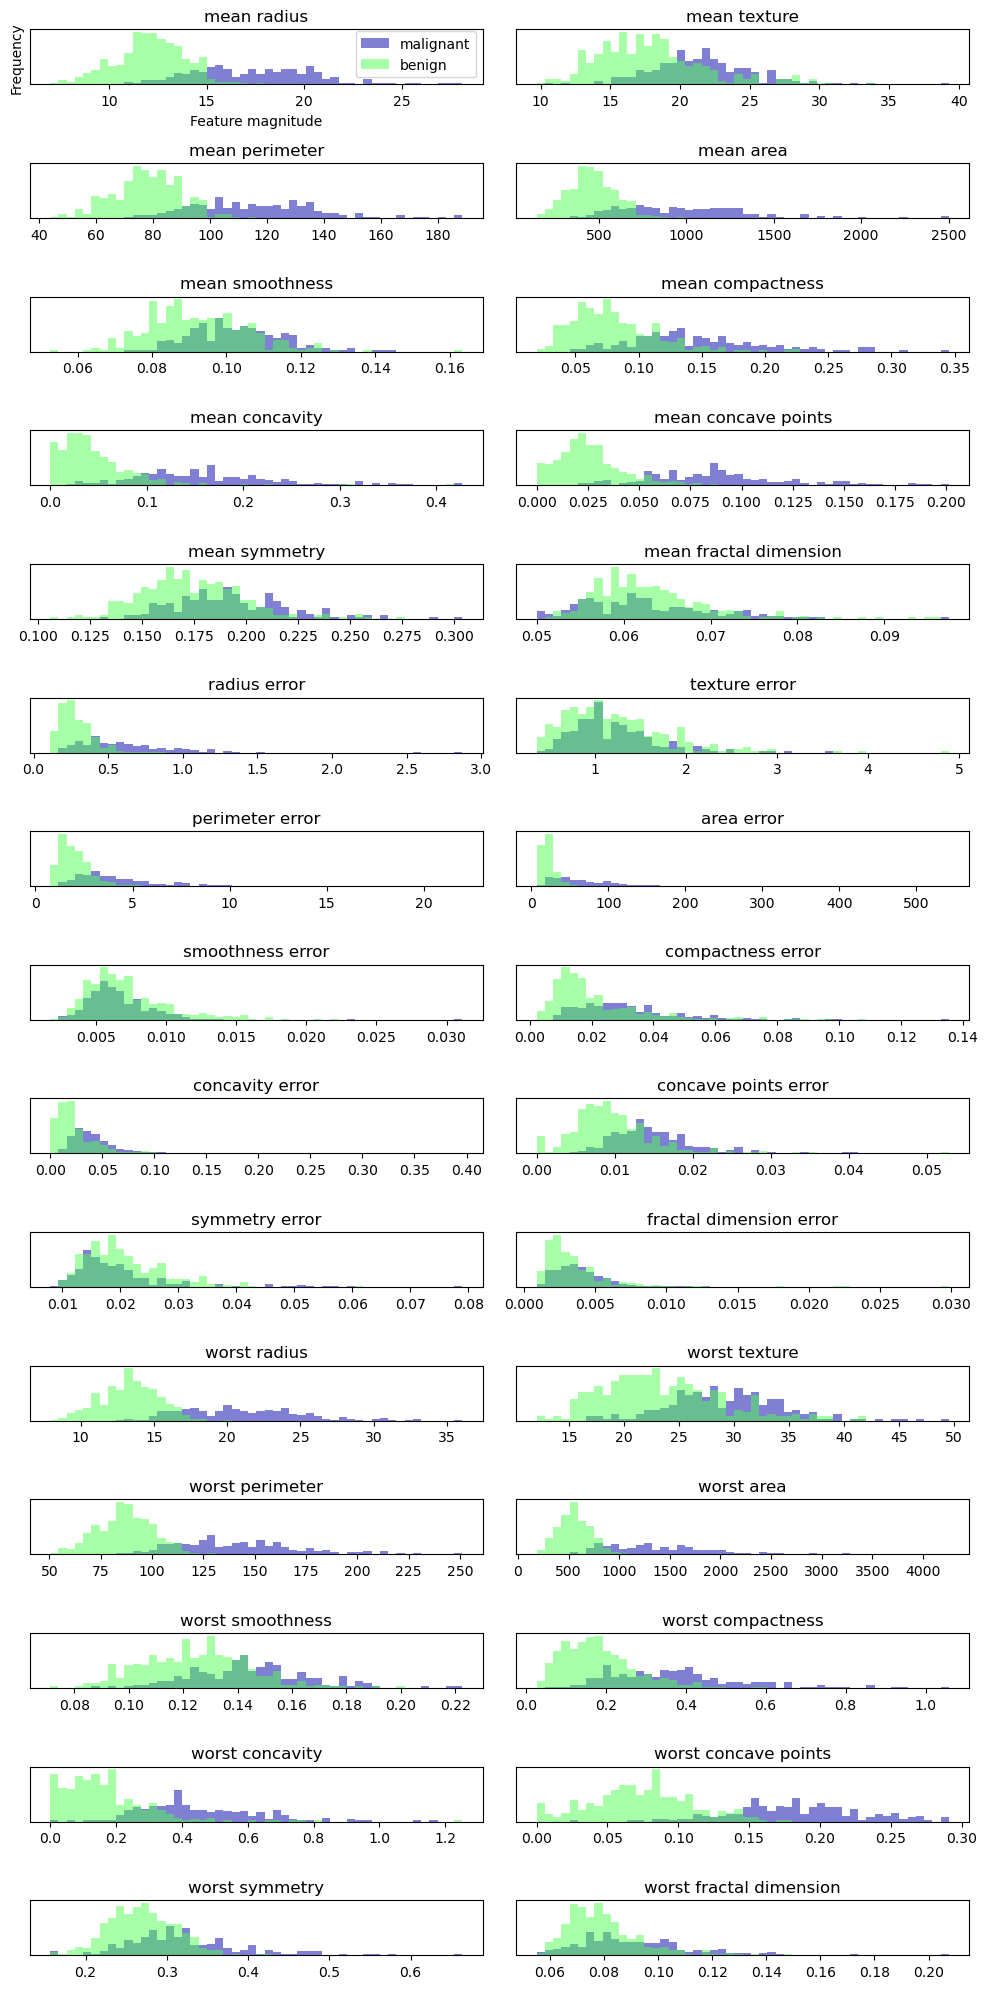

In [60]:
from matplotlib.colors import ListedColormap

cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Interpret the histograms.

Le radius est plus petit quand c'est bénain, la taille du saint est toujours plus petite et mieux définie quand c'est bénain, la compacité est plus grande quand c'est bénain, la concavité est plus grande quand c'est bénain, la concave points est plus grande quand c'est bénain, la symmetry est plus grande quand c'est bénain, la fractal dimension est plus grande quand c'est bénain.

Plus la valeur est elevée plus on est proche d'une tumeur cancereuse 

In [61]:
# Standardisation des données

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

2. Perform a logistic regression in order to predict the cancer output variable. Evaluate the results either using a test sample or using directly the learning sample.

In [62]:
# Question 2

from sklearn.linear_model import LogisticRegression

y = cancer.target

X = cancer.data

logreg = LogisticRegression().fit(X, y)

# Prediction du y_genere avec le y original

y_generated = logreg.predict(X)

print("Training set score: {:.3f}".format(logreg.score(X, y)))

# Calcul de l'accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y, y_generated)

print("Accuracy: {:.3f}".format(accuracy_score(y, y_generated)))

Training set score: 0.947
Accuracy: 0.947


/Users/thibaultchausson/miniconda3/envs/AI53/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3. Find meaningful representations of the transformed and reduced data set in a low dimensional space using PCA. interpret the first two components.

In [63]:
# Question 3

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("ACP shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
ACP shape: (569, 10)


4. Perform a logistic regression using the components as input. How many components should you retain ?

In [64]:
# Question 4

logreg = LogisticRegression().fit(X_pca, y)

print("Training set score: {:.3f}".format(logreg.score(X_pca, y)))

Training set score: 0.986


In [65]:
loadings = pca.components_

np.cumsum(pca.explained_variance_ratio_)

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881])

# Exercice 3 

Wild images Data Set. The aim of this work is to show how PCA can be used in order to perform features extraction. The last particular part allow you to learn the Non-Negative Matrix Factorization method (NME).
Read and follow the instructions in the notebook (may be time consuming).